In [27]:


import matplotlib.pyplot as plt
matplotlib.use("Agg")
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# create generator
datagen = ImageDataGenerator()
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Peaches V Apples', class_mode='binary')
test_it = datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/fruits-360/Test', class_mode='binary')
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 8119 images belonging to 2 classes.
Found 1855 images belonging to 2 classes.
Batch shape=(32, 256, 256, 3), min=0.000, max=255.000


In [5]:
def createModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))


  return model

In [6]:

model = createModel()

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [9]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [15]:
with tf.device('/device:GPU:0'):
  history = model.fit_generator(train_it, steps_per_epoch=16, epochs = 5)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
16/16 [==============================] - 168s 10s/step - loss: 0.3110 - accuracy: 0.8906
Epoch 2/5
16/16 [==============================] - 151s 9s/step - loss: 0.4918 - accuracy: 0.8945
Epoch 3/5
16/16 [==============================] - 147s 9s/step - loss: 5.2482 - accuracy: 0.7305
Epoch 4/5
16/16 [==============================] - 137s 8s/step - loss: 0.8160 - accuracy: 0.7305
Epoch 5/5
16/16 [==============================] - 128s 8s/step - loss: 0.4467 - accuracy: 0.8379


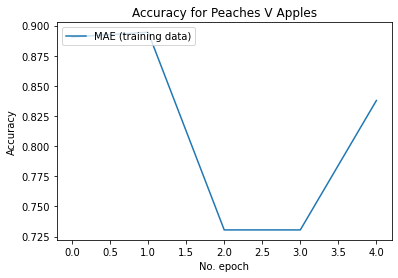

In [30]:
plt.plot(history.history['accuracy'], label='MAE (training data)')
plt.title('Accuracy for Peaches V Apples')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [17]:
test = model.evaluate(test_it)

58/58 [==============================] - 678s 12s/step - loss: 0.5860 - accuracy: 0.8097


In [18]:
print(test)

[0.5860278606414795, 0.809703528881073]


In [31]:
# The next step is to improve the accuracy by trying the following things: Decreasing the learning rate because the accuracy is oscilatting, and increase epochs